# Analyze Product Sentiment

### Import

In [136]:
import turicreate

import matplotlib.pyplot as plt
%matplotlib inline

### Read product review data

In [137]:
products = turicreate.SFrame('https://static.turi.com/datasets/amazon_baby_products/amazon_baby.gl')

### Explore data

In [138]:
products.head()

Columns:
	name	str
	review	str
	rating	float

Rows: 10

Data:
+-------------------------------+-------------------------------+--------+
|              name             |             review            | rating |
+-------------------------------+-------------------------------+--------+
|    Planetwise Flannel Wipes   | These flannel wipes are OK... |  3.0   |
|     Planetwise Wipe Pouch     | it came early and was not ... |  5.0   |
| Annas Dream Full Quilt wit... | Very soft and comfortable ... |  5.0   |
| Stop Pacifier Sucking with... | This is a product well wor... |  5.0   |
| Stop Pacifier Sucking with... | All of my kids have cried ... |  5.0   |
| Stop Pacifier Sucking with... | When the Binky Fairy came ... |  5.0   |
| A Tale of Baby's Days with... | Lovely book, it's bound ti... |  4.0   |
| Baby Tracker&reg; - Daily ... | Perfect for new parents. W... |  5.0   |
| Baby Tracker&reg; - Daily ... | A friend of mine pinned th... |  5.0   |
| Baby Tracker&reg; - Daily ... | This has been an easy way ... |  4.0   |
+-------------------------------+-------------------------------+--------+
[10 rows x 3 columns]

In [139]:
products.groupby('name',operations={'count':turicreate.aggregate.COUNT()}).sort('count',ascending=False)

Columns:
	name	str
	count	int

Rows: 32419

Data:
+--------------------------------+-------+
|              name              | count |
+--------------------------------+-------+
| Vulli Sophie the Giraffe T...  |  785  |
| Simple Wishes Hands-Free B...  |  562  |
| Infant Optics DXR-5 2.4 GH...  |  561  |
| Baby Einstein Take Along Tunes |  547  |
| Cloud b Twilight Constella...  |  520  |
| Fisher-Price Booster Seat,...  |  489  |
| Fisher-Price Rainforest Ju...  |  450  |
| Graco Nautilus 3-in-1 Car ...  |  419  |
| Leachco Snoogle Total Body...  |  388  |
| Regalo Easy Step Walk Thru...  |  374  |
+--------------------------------+-------+
[32419 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [140]:
products['name'].show()

Materializing SArray

### Examine the reivews for the most-reviewed product

In [141]:
giraffe_reviews = products[products['name']=='Vulli Sophie the Giraffe Teether']

In [142]:
giraffe_reviews

Columns:
	name	str
	review	str
	rating	float

Rows: Unknown

Data:
+-------------------------------+-------------------------------+--------+
|              name             |             review            | rating |
+-------------------------------+-------------------------------+--------+
| Vulli Sophie the Giraffe T... | He likes chewing on all th... |  5.0   |
| Vulli Sophie the Giraffe T... | My son loves this toy and ... |  5.0   |
| Vulli Sophie the Giraffe T... | There really should be a l... |  1.0   |
| Vulli Sophie the Giraffe T... | All the moms in my moms' g... |  5.0   |
| Vulli Sophie the Giraffe T... | I was a little skeptical o... |  5.0   |
| Vulli Sophie the Giraffe T... | I have been reading about ... |  5.0   |
| Vulli Sophie the Giraffe T... | My neice loves her sophie ... |  5.0   |
| Vulli Sophie the Giraffe T... | What a friendly face!  And... |  5.0   |
| Vulli Sophie the Giraffe T... | We got this just for my so... |  5.0   |
| Vulli Sophie the Giraffe T... | My baby seems to like this... |  3.0   |
+-------------------------------+-------------------------------+--------+
[? rows x 3 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [143]:
len(giraffe_reviews)

785

In [144]:
giraffe_reviews['rating'].show()

Materializing SArray

# Building a sentiment classifier

### Build word count vectors

In [145]:
products['word_count'] = turicreate.text_analytics.count_words(products['review'])

In [146]:
products

Columns:
	name	str
	review	str
	rating	float
	word_count	dict

Rows: 183531

Data:
+-------------------------------+-------------------------------+--------+
|              name             |             review            | rating |
+-------------------------------+-------------------------------+--------+
|    Planetwise Flannel Wipes   | These flannel wipes are OK... |  3.0   |
|     Planetwise Wipe Pouch     | it came early and was not ... |  5.0   |
| Annas Dream Full Quilt wit... | Very soft and comfortable ... |  5.0   |
| Stop Pacifier Sucking with... | This is a product well wor... |  5.0   |
| Stop Pacifier Sucking with... | All of my kids have cried ... |  5.0   |
| Stop Pacifier Sucking with... | When the Binky Fairy came ... |  5.0   |
| A Tale of Baby's Days with... | Lovely book, it's bound ti... |  4.0   |
| Baby Tracker&reg; - Daily ... | Perfect for new parents. W... |  5.0   |
| Baby Tracker&reg; - Daily ... | A friend of mine pinned th... |  5.0   |
| Baby Tracker&reg; - Daily ... | This has been an easy way ... |  4.0   |
+-------------------------------+-------------------------------+--------+
+-------------------------------+
|           word_count          |
+-------------------------------+
| {'handles': 1.0, 'strippin... |
| {'recommend': 1.0, 'disapp... |
| {'quilt': 1.0, 'the': 1.0,... |
| {'tool': 1.0, 'clever': 1.... |
| {'rock': 1.0, 'many': 1.0,... |
| {'thumb': 1.0, 'or': 1.0, ... |
| {'for': 1.0, 'barnes': 1.0... |
| {'right': 1.0, 'because': ... |
| {'like': 1.0, 'and': 1.0, ... |
| {'in': 1.0, 'pages': 1.0, ... |
+-------------------------------+
[183531 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

# Define what is positive and negative sentiment

In [147]:
products['rating'].show()

Materializing SArray

In [148]:
#ignore all 3*  reviews
products = products[products['rating']!= 3]

In [149]:
#positive sentiment = 4-star or 5-star reviews
products['sentiment'] = products['rating'] >= 4

In [150]:
products

Columns:
	name	str
	review	str
	rating	float
	word_count	dict
	sentiment	int

Rows: 166752

Data:
+-------------------------------+-------------------------------+--------+
|              name             |             review            | rating |
+-------------------------------+-------------------------------+--------+
|     Planetwise Wipe Pouch     | it came early and was not ... |  5.0   |
| Annas Dream Full Quilt wit... | Very soft and comfortable ... |  5.0   |
| Stop Pacifier Sucking with... | This is a product well wor... |  5.0   |
| Stop Pacifier Sucking with... | All of my kids have cried ... |  5.0   |
| Stop Pacifier Sucking with... | When the Binky Fairy came ... |  5.0   |
| A Tale of Baby's Days with... | Lovely book, it's bound ti... |  4.0   |
| Baby Tracker&reg; - Daily ... | Perfect for new parents. W... |  5.0   |
| Baby Tracker&reg; - Daily ... | A friend of mine pinned th... |  5.0   |
| Baby Tracker&reg; - Daily ... | This has been an easy way ... |  4.0   |
| Baby Tracker&reg; - Daily ... | I love this journal and ou... |  4.0   |
+-------------------------------+-------------------------------+--------+
+-------------------------------+-----------+
|           word_count          | sentiment |
+-------------------------------+-----------+
| {'recommend': 1.0, 'disapp... |     1     |
| {'quilt': 1.0, 'the': 1.0,... |     1     |
| {'tool': 1.0, 'clever': 1.... |     1     |
| {'rock': 1.0, 'many': 1.0,... |     1     |
| {'thumb': 1.0, 'or': 1.0, ... |     1     |
| {'for': 1.0, 'barnes': 1.0... |     1     |
| {'right': 1.0, 'because': ... |     1     |
| {'like': 1.0, 'and': 1.0, ... |     1     |
| {'in': 1.0, 'pages': 1.0, ... |     1     |
| {'tracker': 1.0, 'now': 1.... |     1     |
+-------------------------------+-----------+
[166752 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [151]:
products['sentiment'].show()

Materializing SArray

# Train our sentiment classifier

In [152]:
train_data,test_data = products.random_split(.8,seed=0)

In [153]:
sentiment_model = turicreate.logistic_classifier.create(train_data, target='sentiment', features=['word_count'], validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 57356

Number of coefficients      : 57357

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 0.311825     | 0.841421          | 0.840019            |

| 1         | 9        | 3.250000  | 0.756517     | 0.931359          | 0.911362            |

| 2         | 11       | 2.669978  | 0.969824     | 0.938650          | 0.916466            |

| 3         | 12       | 2.669978  | 1.113649     | 0.927417          | 0.901814            |

| 4         | 14       | 1.326072  | 1.331606     | 0.945200          | 0.918088            |

| 9         | 20       | 1.326072  | 2.096769     | 0.977654          | 0.917698            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

### Evaluate the model

In [154]:
evaluation = sentiment_model.evaluate(test_data)
evaluation

{'accuracy': 0.9176975738650012,
 'auc': 0.9342357833151299,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |  1397 |
 |      1       |        0        |  1344 |
 |      0       |        0        |  3931 |
 |      1       |        1        | 26632 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.951057941255245,
 'log_loss': 0.3304787187240934,
 'precision': 0.9501587641371436,
 'recall': 0.9519588218472976,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0

In [155]:
sentiment_model.summary()

Class                          : LogisticClassifier

Schema
------
Number of coefficients         : 57357
Number of examples             : 133448
Number of classes              : 2
Number of feature columns      : 1
Number of unpacked features    : 57356

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : lbfgs
Solver iterations              : 10
Solver status                  : Completed (Iteration limit reached).
Training time (sec)            : 1.4875

Settings
--------
Log-likelihood                 : 9590.1752

Highest Positive Coefficients
-----------------------------
word_count[arghhhhhh]          : 49.2272
word_count[joovys]             : 34.2942
word_count[screencons]         : 29.1217
word_count[punchers]           : 27.5292
word_count[roboticness]        : 27.3339

Lowest Negative Coefficients
----------------------------
word_count[transpired]        

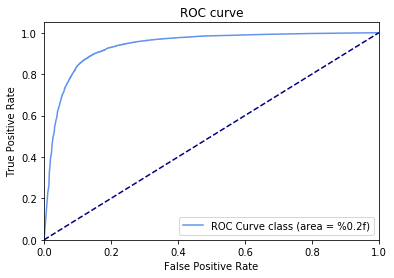

In [156]:
plt.plot(evaluation['roc_curve']['fpr'],
         evaluation['roc_curve']['tpr'],
         color ='cornflowerblue',
         label='ROC Curve class (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()

# Apply the sentiment classifier to better understand the Giraffe reviews

In [157]:
products['predicted_sentiment'] = sentiment_model.predict(products, output_type = 'probability')

In [158]:
products

Columns:
	name	str
	review	str
	rating	float
	word_count	dict
	sentiment	int
	predicted_sentiment	float

Rows: 166752

Data:
+-------------------------------+-------------------------------+--------+
|              name             |             review            | rating |
+-------------------------------+-------------------------------+--------+
|     Planetwise Wipe Pouch     | it came early and was not ... |  5.0   |
| Annas Dream Full Quilt wit... | Very soft and comfortable ... |  5.0   |
| Stop Pacifier Sucking with... | This is a product well wor... |  5.0   |
| Stop Pacifier Sucking with... | All of my kids have cried ... |  5.0   |
| Stop Pacifier Sucking with... | When the Binky Fairy came ... |  5.0   |
| A Tale of Baby's Days with... | Lovely book, it's bound ti... |  4.0   |
| Baby Tracker&reg; - Daily ... | Perfect for new parents. W... |  5.0   |
| Baby Tracker&reg; - Daily ... | A friend of mine pinned th... |  5.0   |
| Baby Tracker&reg; - Daily ... | This has been an easy way ... |  4.0   |
| Baby Tracker&reg; - Daily ... | I love this journal and ou... |  4.0   |
+-------------------------------+-------------------------------+--------+
+-------------------------------+-----------+---------------------+
|           word_count          | sentiment | predicted_sentiment |
+-------------------------------+-----------+---------------------+
| {'recommend': 1.0, 'disapp... |     1     |  0.9997307390047108 |
| {'quilt': 1.0, 'the': 1.0,... |     1     |  0.9985083368316823 |
| {'tool': 1.0, 'clever': 1.... |     1     |  0.9997489042499907 |
| {'rock': 1.0, 'many': 1.0,... |     1     |  0.9999916625399978 |
| {'thumb': 1.0, 'or': 1.0, ... |     1     |  0.9999999514462167 |
| {'for': 1.0, 'barnes': 1.0... |     1     |  0.999914673556992  |
| {'right': 1.0, 'because': ... |     1     |  0.9999916615904654 |
| {'like': 1.0, 'and': 1.0, ... |     1     |  0.999993884359401  |
| {'in': 1.0, 'pages': 1.0, ... |     1     |  0.9961247617005264 |
| {'tracker': 1.0, 'now': 1.... |     1     |  0.9999999920460633 |
+-------------------------------+-----------+---------------------+
[166752 rows x 6 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [159]:
giraffe_reviews = products[products['name']== 'Vulli Sophie the Giraffe Teether']

In [160]:
giraffe_reviews

Columns:
	name	str
	review	str
	rating	float
	word_count	dict
	sentiment	int
	predicted_sentiment	float

Rows: Unknown

Data:
+-------------------------------+-------------------------------+--------+
|              name             |             review            | rating |
+-------------------------------+-------------------------------+--------+
| Vulli Sophie the Giraffe T... | He likes chewing on all th... |  5.0   |
| Vulli Sophie the Giraffe T... | My son loves this toy and ... |  5.0   |
| Vulli Sophie the Giraffe T... | There really should be a l... |  1.0   |
| Vulli Sophie the Giraffe T... | All the moms in my moms' g... |  5.0   |
| Vulli Sophie the Giraffe T... | I was a little skeptical o... |  5.0   |
| Vulli Sophie the Giraffe T... | I have been reading about ... |  5.0   |
| Vulli Sophie the Giraffe T... | My neice loves her sophie ... |  5.0   |
| Vulli Sophie the Giraffe T... | What a friendly face!  And... |  5.0   |
| Vulli Sophie the Giraffe T... | We got this just for my so... |  5.0   |
| Vulli Sophie the Giraffe T... | This product is without a ... |  5.0   |
+-------------------------------+-------------------------------+--------+
+-------------------------------+-----------+---------------------+
|           word_count          | sentiment | predicted_sentiment |
+-------------------------------+-----------+---------------------+
| {'purchase': 1.0, 'teethin... |     1     |  0.9993655365682539 |
| {'a': 1.0, 'is': 1.0, 'whe... |     1     |  0.9998633791689671 |
| {'made': 1.0, 'of': 1.0, '... |     0     |  0.2545268197498974 |
| {'another': 1.0, 'out': 1.... |     1     |  0.9165688083896313 |
| {'disappointed': 1.0, 'wil... |     1     |  0.6855768205781081 |
| {'late': 1.0, 'perfect': 1... |     1     |   0.99999994452112  |
| {'delight': 1.0, 'in': 1.0... |     1     |  0.9979351181092777 |
| {'inside': 1.0, 'water': 1... |     1     |  0.9999745004834412 |
| {'its': 1.0, 'fine': 1.0, ... |     1     |  0.9460144428330308 |
| {'belongs': 1.0, 'dog': 1.... |     1     |  0.9999999721665869 |
+-------------------------------+-----------+---------------------+
[? rows x 6 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

# Sort the Giraffe reviews according to predicted sentiment

In [161]:
giraffe_reviews = giraffe_reviews.sort('predicted_sentiment', ascending=False)

In [162]:
giraffe_reviews

Columns:
	name	str
	review	str
	rating	float
	word_count	dict
	sentiment	int
	predicted_sentiment	float

Rows: 723

Data:
+-------------------------------+-------------------------------+--------+
|              name             |             review            | rating |
+-------------------------------+-------------------------------+--------+
| Vulli Sophie the Giraffe T... | Sophie, oh Sophie, your ti... |  5.0   |
| Vulli Sophie the Giraffe T... | I'll be honest...I bought ... |  4.0   |
| Vulli Sophie the Giraffe T... | As a mother of 16month old... |  5.0   |
| Vulli Sophie the Giraffe T... | We got this little giraffe... |  5.0   |
| Vulli Sophie the Giraffe T... | As every mom knows, you al... |  5.0   |
| Vulli Sophie the Giraffe T... | My Mom-in-Law bought Sophi... |  5.0   |
| Vulli Sophie the Giraffe T... | My 4 month old son is teet... |  4.0   |
| Vulli Sophie the Giraffe T... | Let me just start off by a... |  5.0   |
| Vulli Sophie the Giraffe T... | I'm not sure why Sophie is... |  4.0   |
| Vulli Sophie the Giraffe T... | I admit, I didn't get Soph... |  4.0   |
+-------------------------------+-------------------------------+--------+
+-------------------------------+-----------+---------------------+
|           word_count          | sentiment | predicted_sentiment |
+-------------------------------+-----------+---------------------+
| {'11': 1.0, 'prisrob': 1.0... |     1     |         1.0         |
| {'around': 1.0, 'explore':... |     1     |         1.0         |
| {'will': 1.0, '15months': ... |     1     |         1.0         |
| {'out': 1.0, 've': 1.0, 'w... |     1     |  0.9999999999998377 |
| {'whether': 1.0, 'neutral'... |     1     |  0.9999999999998284 |
| {'penny': 1.0, 'little': 1... |     1     |  0.9999999999997958 |
| {'worth': 1.0, 'works': 1.... |     1     |  0.9999999999994914 |
| {'question': 1.0, 'must': ... |     1     |  0.9999999999941254 |
| {'makers': 1.0, 'or': 1.0,... |     1     |  0.999999999987423  |
| {'dye': 1.0, 'of': 1.0, 'c... |     1     |  0.9999999999829475 |
+-------------------------------+-----------+---------------------+
[723 rows x 6 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [163]:
giraffe_reviews.tail()

Columns:
	name	str
	review	str
	rating	float
	word_count	dict
	sentiment	int
	predicted_sentiment	float

Rows: 10

Data:
+-------------------------------+-------------------------------+--------+
|              name             |             review            | rating |
+-------------------------------+-------------------------------+--------+
| Vulli Sophie the Giraffe T... | My 7 1/2 month old grandba... |  1.0   |
| Vulli Sophie the Giraffe T... | I was so looking forward t... |  1.0   |
| Vulli Sophie the Giraffe T... | Received the product and s... |  1.0   |
| Vulli Sophie the Giraffe T... | I got one of these as a sh... |  1.0   |
| Vulli Sophie the Giraffe T... | When we first got it I tho... |  2.0   |
| Vulli Sophie the Giraffe T... | When I received this the p... |  1.0   |
| Vulli Sophie the Giraffe T... | "Sophie the Giraffe" has t... |  1.0   |
| Vulli Sophie the Giraffe T... | My son (now 2.5) LOVED his... |  1.0   |
| Vulli Sophie the Giraffe T... | I wanted to love this prod... |  1.0   |
| Vulli Sophie the Giraffe T... | This children's toy is nos... |  1.0   |
+-------------------------------+-------------------------------+--------+
+-------------------------------+-----------+------------------------+
|           word_count          | sentiment |  predicted_sentiment   |
+-------------------------------+-----------+------------------------+
| {'sopie': 1.0, 'with': 1.0... |     0     | 1.911074019337438e-06  |
| {'amazon': 1.0, 'back': 1.... |     0     | 6.547801684296422e-07  |
| {'was': 1.0, 'as': 1.0, 's... |     0     | 3.8642363969831753e-07 |
| {'typical': 1.0, 'paint': ... |     0     | 2.2378225152486346e-07 |
| {'mom': 1.0, 'teethers': 1... |     0     | 1.9353955279999029e-07 |
| {'worth': 1.0, 'for': 1.0,... |     0     | 1.690075397940123e-07  |
| {'ingest': 1.0, 'they': 1.... |     0     | 1.1748826795804481e-07 |
| {'exaggerated': 1.0, 'a': ... |     0     | 5.364933426317972e-11  |
| {'risk': 1.0, 'ready': 1.0... |     0     | 3.109035269766836e-13  |
| {'amazon': 1.0, 'from': 1.... |     0     | 4.119269638695509e-15  |
+-------------------------------+-----------+------------------------+
[10 rows x 6 columns]

## Show the most positive reviews

In [164]:
giraffe_reviews[0]['review']

"Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie's Day, thus the name was born. Since that time millions of Sophie's populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet's attention. Sophie has happy little squeaks that bring squeals of delight from Viol

In [165]:
giraffe_reviews[1]['review']

'I\'ll be honest...I bought this toy because all the hip parents seem to have one too and I wanted to be a part of the "hip parent" crowd. The price-tag was somewhat of a deterent but I prevailed and purchased this teether for my daughter.At first, Lily didn\'t know what to make of of Sophie and showed little interest in the polka-dotted creature. I continued to introduce Lily to Sophie and kept the toy in the carrier so that it was on-hand during transitions. Eventually, Lily discovered what a wonderful experience it was to gnaw on the hooves and ears and these two have never been far apart since.Lily really enjoys gumming all the different parts of Sophie like no other teether we have. The size of the toy is great as it is somewhat substantial and so easy for a little one to grasp and hold onto. Lily really enjoys hearing Sophie squeak and will smile whenever Sophie makes a noise or pops her head up from Mommy\'s lap to say hello.People have stopped and commented on Sophie and to the

# Most negative reivews

In [166]:
giraffe_reviews[-1]['review']

"This children's toy is nostalgic and very cute. However, there is a distinct rubber smell and a very odd taste, yes I tried it, that my baby did not enjoy. Also, if it is soiled it is extremely difficult to clean as the rubber is a kind of porus material and does not clean well. The final thing is the squeaking device inside which stopped working after the first couple of days. I returned this item feeling I had overpaid for a toy that was defective and did not meet my expectations. Please do not be swayed by the cute packaging and hype surounding it as I was. One more thing, I was given a full refund from Amazon without any problem."

In [167]:
giraffe_reviews[-2]['review']

'I wanted to love this product and was excited to buy it when I became pregnant but am now hesitant to let my baby use it after reading about the recall in Europe. Apparently, as I understand it, their toxin standards of measurement are lower than ours so they have not been recalled here (apparently we are OK with low levels of nitrates in the toys our children put in their mouths, but Europeans are not...hmmm)...Be that as it may, toxins registering even CLOSE to a dangerous level made me nervous about using. After digging around online I did discover that the company claims to have changed the product after a certain date and lists manufacturing codes so you can check yours (those listed were made after a certain date and are said to be safer). Sadly mine was not made after the &#34;improved&#34; date but I could not return it because there was no formal recall in our country. I considered returning it and hunting for one with an approved manufacturing date but man that was just too 

### Another product

In [168]:
diaper_champ_reviews = products[products['name'] == 'Baby Trend Diaper Champ']

In [176]:
diaper_champ_reviews = diaper_champ_reviews.sort('predicted_sentiment', ascending=False)
diaper_champ_reviews[0:1]

Columns:
	name	str
	review	str
	rating	float
	word_count	dict
	sentiment	int
	predicted_sentiment	float

Rows: 1

Data:
+-------------------------+-------------------------------+--------+
|           name          |             review            | rating |
+-------------------------+-------------------------------+--------+
| Baby Trend Diaper Champ | I read a review below that... |  4.0   |
+-------------------------+-------------------------------+--------+
+-------------------------------+-----------+---------------------+
|           word_count          | sentiment | predicted_sentiment |
+-------------------------------+-----------+---------------------+
| {'key': 1.0, 'have': 1.0, ... |     1     |  0.9999999999895941 |
+-------------------------------+-----------+---------------------+
[1 rows x 6 columns]

In [170]:
sentiment_model.predict(diaper_champ_reviews[0:1], output_type='probability')

dtype: float
Rows: 1
[0.9999999999895941]